In [1]:
from tensorflow import keras
import numpy as np
import sklearn.metrics as sk
import matplotlib.pyplot as plt
import itertools
import os

In [2]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [5]:
model = keras.models.load_model('C:/Users/samee/Documents/Imagine Cup Saved Models/Combined Binary Callbacks/08-16.88.h5')

In [6]:
test_directory = 'C:/Users/samee/Downloads/Combined-Binary/Valid/ValidPA'

In [7]:
test_dataset = keras.preprocessing.image_dataset_from_directory(
        test_directory, 
        batch_size= 32,
        image_size=(224, 224), 
        color_mode='rgb',
        label_mode='binary',
        shuffle = False,
        seed = 7
    )

Found 19346 files belonging to 2 classes.


In [8]:
# Chex = model.predict(test_dataset, verbose = 1)
combined = model.predict(test_dataset, verbose = 1)

605/605 [==============================] - 59s 88ms/step


In [7]:
np.round(combined)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [16]:
def test_categorical(y_pred):
    labels = np.array([])
    for x, y in test_dataset:
        # labels = np.concatenate([labels, np.argmax(y.numpy(), axis = -1)])
        print(y)
    # prediction = np.argmax(y_pred, axis = -1)
    # # cm = sk.confusion_matrix(y_true = labels, y_pred = prediction)
    # # return cm
    # acc = sk.classification_report(labels, prediction)
    # return acc

In [10]:
def test_binary(y_pred):
    labels = np.array([])
    for x, y in test_dataset:
        for i in y:
            labels = np.concatenate([labels, i])
    prediction = np.round(y_pred)
    # cm = sk.confusion_matrix(y_true = labels, y_pred = prediction)
    # return cm
    acc = sk.classification_report(labels, prediction)
    return acc

In [11]:
a = test_binary(combined)

In [12]:
print(a)

              precision    recall  f1-score   support

         0.0       0.73      0.61      0.67     10386
         1.0       0.62      0.74      0.68      8960

    accuracy                           0.67     19346
   macro avg       0.68      0.68      0.67     19346
weighted avg       0.68      0.67      0.67     19346



In [9]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


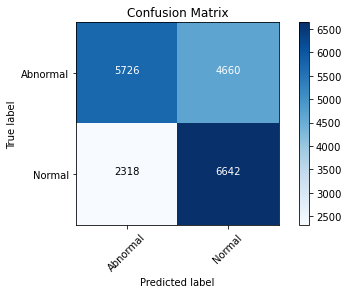

In [10]:
folders = os.listdir(test_directory)
# plt.rcParams['figure.figsize'] = [15, 15]
plot_confusion_matrix(test_binary(combined), title = 'Confusion Matrix', classes = folders, normalize = False)